In [42]:
from music21 import *
from matplotlib import pyplot as plt

In [43]:
import importlib
try:
    importlib.reload(dataset)
    importlib.reload(salami)
    importlib.reload(song)
except NameError:
    pass

from parser import *

In [44]:
ds = dataset.Dataset()
# print(ds.songs)

In [45]:
s = ds.songs[0]
print(s)
c = s.chords()
print(c.blocks)

[0003] I Don't Mind - James Brown (8 weeks)
[(0.0, <ChordBlock silence>), (0.073469387, <ChordBlock A, intro (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (8.714013605, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (15.611995464, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (22.346394557, <ChordBlock B, verse (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (29.219433106, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (36.279501133, <ChordBlock (('F:maj',), ('F:maj',), ('D:maj',), ('D:maj',))>), (43.053922902, <ChordBlock (('G:maj',), ('G:maj',), ('C:maj',), ('C:maj',))>), (49.23802721, <ChordBlock B, verse (('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',))>), (56.185079365, <ChordBlock (('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',))>), (63.007732426, <ChordBlock (('F:maj',), ('F:maj',), ('D:maj',), ('D:maj',))>), (69.942857142, <ChordBlock (('G:maj',), ('G:maj',), ('C:maj',), ('C:maj',))>), (76.123990929, <ChordBlock A, int

In [24]:
from collections import Counter

prog_counts = Counter()
progs = {}
for s in ds.songs:
    c = s.chords()
    used_chords = set()
    for time, block in c.blocks:
        if block.bars:
            if ('N',) in block.bars:
                # human didn't know chord
                continue

            if block.bars not in used_chords:
                prog_counts[block.bars] += 1
                used_chords.add(block.bars)
                
                if block.bars not in progs:
                    progs[block.bars] = []
                progs[block.bars].append(s)
for bars, count in prog_counts.most_common(20):
    print(bars, count)

(('D:maj',), ('D:maj',), ('D:maj',), ('D:maj',)) 27
(('E:maj',), ('E:maj',), ('E:maj',), ('E:maj',)) 26
(('D:maj',), ('D:maj',)) 23
(('G:maj',), ('G:maj',)) 22
(('G:maj',), ('G:maj',), ('G:maj',), ('G:maj',)) 22
(('E:maj',), ('E:maj',)) 20
(('C:maj',), ('C:maj',), ('C:maj',), ('C:maj',)) 20
(('A:maj',),) 18
(('A:maj',), ('A:maj',), ('A:maj',), ('A:maj',)) 16
(('C:maj',), ('C:maj',)) 15
(('D:maj',), ('D:maj',), ('A:maj',), ('A:maj',)) 13
(('D:maj',),) 12
(('Bb:maj',), ('Bb:maj',), ('Bb:maj',), ('Bb:maj',)) 12
(('A:maj',), ('A:maj',), ('E:maj',), ('E:maj',)) 11
(('D:min',), ('D:min',), ('D:min',), ('D:min',)) 11
(('C:maj',), ('C:maj',), ('G:maj',), ('G:maj',)) 11
(('E:maj',),) 11
(('Eb:maj',), ('Eb:maj',)) 11
(('C:maj',),) 10
(('F:7',), ('F:7',), ('F:7',), ('F:7',)) 10


In [25]:
for bars, count in prog_counts.most_common(50):
    songs = progs[bars]
    print(bars, count)
    for s in songs:
        print("\t", s)
    print()

(('D:maj',), ('D:maj',), ('D:maj',), ('D:maj',)) 27
	 [0114] Sunshine Of Your Love - Cream (26 weeks)
	 [0167] No Charge - Melba Montgomery (10 weeks)
	 [0196] Love Me Warm And Tender - Paul Anka (12 weeks)
	 [0245] It Amazes Me - John Denver (7 weeks)
	 [0293] Every Little Thing She Does Is Magic - The Police (19 weeks)
	 [0351] Roll On Down The Highway - Bachman-Turner Overdrive (11 weeks)
	 [0359] Just Like Heaven - The Cure (19 weeks)
	 [0517] All Those Years Ago - George Harrison (16 weeks)
	 [0620] Twistin  The Night Away (From "Innerspace") - Rod Stewart (4 weeks)
	 [0656] Years From Now - Dr. Hook (9 weeks)
	 [0668] Big Yellow Taxi - Joni Mitchell (16 weeks)
	 [0681] With Or Without You - U2 (18 weeks)
	 [0690] Queen Of Hearts - Juice Newton (27 weeks)
	 [0734] I Will - Dean Martin (10 weeks)
	 [0743] One Way Or Another - Blondie (14 weeks)
	 [0818] Blue Jean - David Bowie (18 weeks)
	 [0891] Happy Jack - The Who (9 weeks)
	 [0914] If Not You - Dr. Hook (11 weeks)
	 [0935] Cry 

In [26]:
least_common = list(filter(lambda x: x[1] > 1, sorted(prog_counts.items(), key=lambda a: a[1])))
for bars, count in least_common[:20]:
    songs = progs[bars]
    print(bars, count)
    for s in songs:
        print("\t", s, s.tuning())
    print()

(('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',)) 2
	 [0003] I Don't Mind - James Brown (8 weeks) 441.452
	 [0828] Journey To The Center Of The Mind - The Amboy Dukes (12 weeks) 441.022

(('Ab:maj',), ('Ab:maj',), ('Eb:7',), ('Eb:7',)) 2
	 [0004] You've Got A Friend - Roberta Flack,Donny Hathaway (12 weeks) 442.773
	 [1245] Paper Roses - Marie Osmond (16 weeks) 440.366

(('C:5',),) 2
	 [0006] The Rose - Bette Midler (25 weeks) 440.435
	 [0089] Fire And Ice - Pat Benatar (15 weeks) 440.685

(('Eb:7(#9)',), ('Eb:7(#9)',), ('Eb:7(#9)',), ('Eb:7(#9)',)) 2
	 [0015] Last Child - Aerosmith (15 weeks) 437.607
	 [0640] Think - James Brown (16 weeks) 436.51

(('Db:maj',),) 2
	 [0019] Here's Some Love - Tanya Tucker (5 weeks) 442.527
	 [1218] Behind Closed Doors - Charlie Rich (19 weeks) 439.864

(('E:maj', 'A:maj'), ('E:maj',), ('E:maj', 'A:maj'), ('E:maj',)) 2
	 [0023] And She Was - Talking Heads (20 weeks) 440.922
	 [0457] Not Fade Away - The Rolling Stones (13 weeks) 439.365

(('F:maj',), ('Bb

In [27]:
for s in ds.songs:
    if s.weeks_on_chart < 3:
        print(s, s.tuning())

[0123] Silent Night - Bing Crosby (2 weeks) 440.557
[0214] (Night Time Is) The Right Time - Ray Charles (1 week) 443.777
[0251] Theme From Electric Surfboard - Brother Jack McDuff (2 weeks) 440.517
[0372] Scarlet Fever - Kenny Rogers (2 weeks) 443.596
[0510] How Blue Can You Get - B.B. King (2 weeks) 443.731
[1034] Sugar Magnolia - Grateful Dead (2 weeks) 438.833
[1149] Going To Chicago Blues - Count Basie (1 week) 438.943
[1281] When It's Love - Van Halen (2 weeks) 440.741


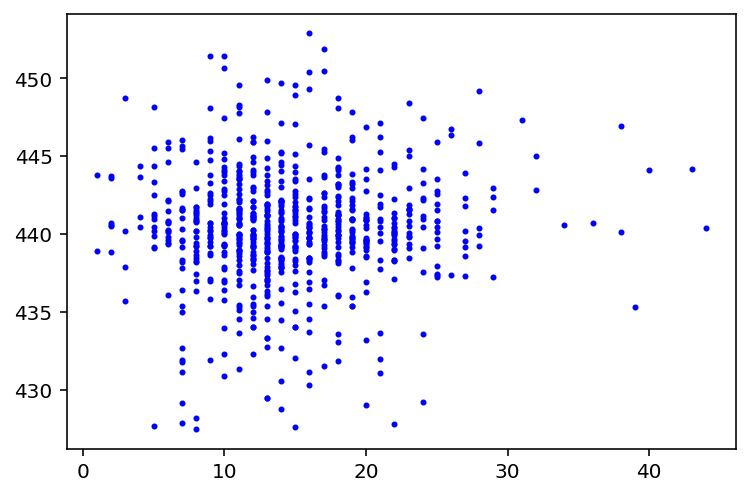

In [28]:
weeks = []
tunings = []
for s in ds.songs:
    weeks.append(s.weeks_on_chart)
    tunings.append(s.tuning())

plt.figure()
plt.plot(weeks,tunings, 'bo', markersize=2)

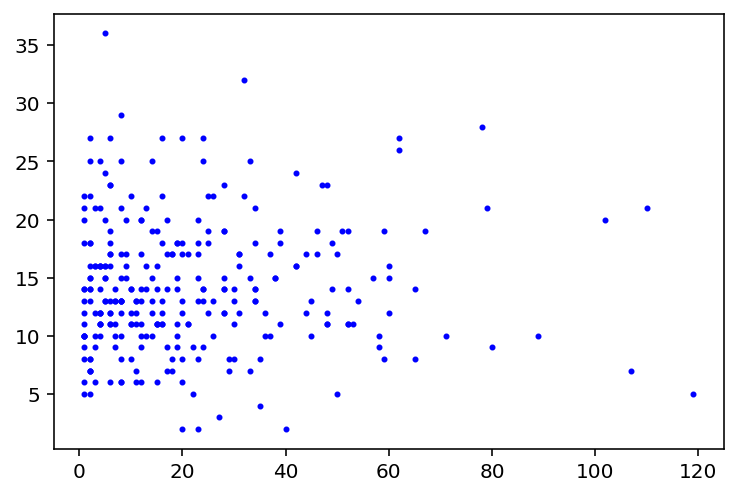

In [29]:
weeks = []
times = []
c = "D:maj"
for s in ds.songs:
    o = s.chords().chord_occurrences()
    if o[c] == 0:
        continue
    weeks.append(s.weeks_on_chart)
    times.append(o[c])

plt.figure()
plt.plot(times, weeks, 'bo', markersize=2)

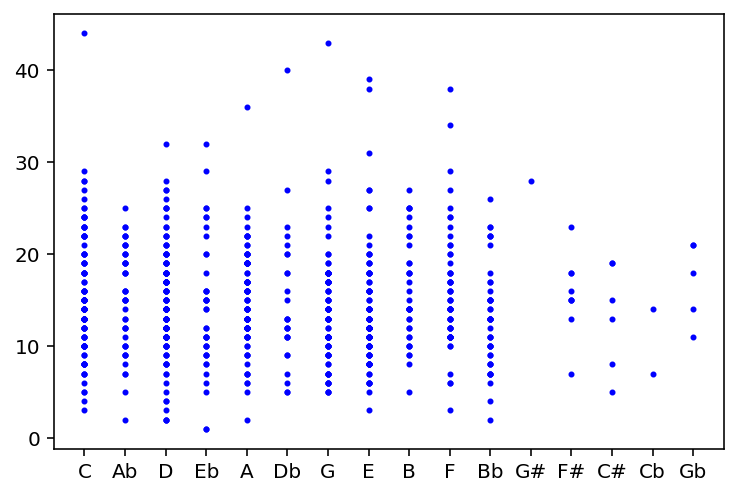

In [30]:
weeks = []
keys = []
for s in ds.songs:
    c = s.chords()
    weeks.append(s.weeks_on_chart)
    keys.append(c.tonic)

plt.figure()
plt.plot(keys, weeks, 'bo', markersize=2)

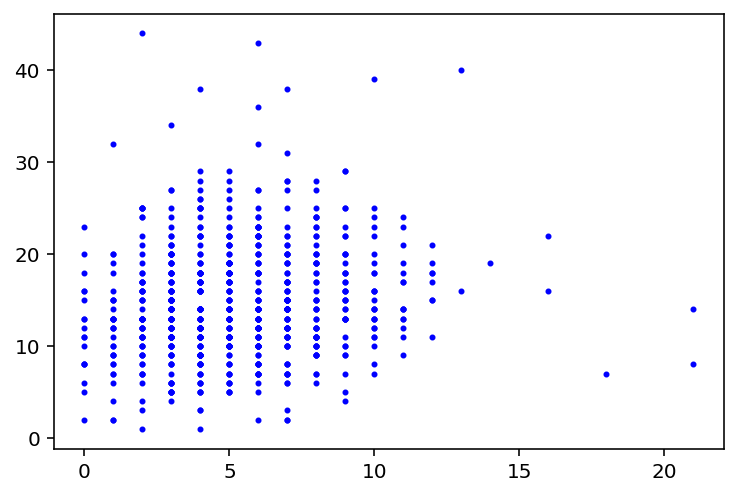

In [31]:
weeks = []
repetition = []
for s in ds.songs:
    c = s.chords()
    r = Counter()
    rep = 0
    for _, b in c.blocks:
        if b.block and b.block != "Z":
            r[b.block] += 1
    for _, count in r.items():
        rep += count - 1
#     print(r, rep)

    weeks.append(s.weeks_on_chart)
    repetition.append(rep)

plt.figure()
plt.plot(repetition, weeks, 'bo', markersize=2)

In [32]:
s = ds.songs[0]

In [33]:
list(s.chords().linear())

['A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min']

In [34]:
s.chords().transition_counts()

{'A:min': {'C:maj': 9},
 'C:maj': {'A:min': 9, 'F:maj': 4, 'A:maj': 4},
 'F:maj': {'D:maj': 4},
 'D:maj': {'G:maj': 4},
 'G:maj': {'C:maj': 4},
 'A:maj': {'C:maj': 4}}

In [35]:
ds.songs[1].chords().transition_probabilities(roman=True)

{'I': {'IV': 0.5714285714285714,
  'VII': 0.09523809523809523,
  'I': 0.19047619047619047,
  'V': 0.09523809523809523,
  'bVII': 0.047619047619047616},
 'IV': {'I': 0.5625, 'bVII': 0.1875, 'IV': 0.125, 'iii': 0.125},
 'VII': {'III': 1.0},
 'III': {'vi': 0.875, 'III': 0.125},
 'vi': {'III': 0.625, 'ii': 0.375},
 'ii': {'V': 0.4, 'iii': 0.2, 'I': 0.4},
 'V': {'I': 0.7142857142857143, 'V': 0.2857142857142857},
 'iii': {'V': 0.3333333333333333, 'ii': 0.6666666666666666},
 'bVII': {'IV': 0.75, 'vi': 0.25}}

In [36]:
ds.songs[0].spotify_info()["popularity"]

19

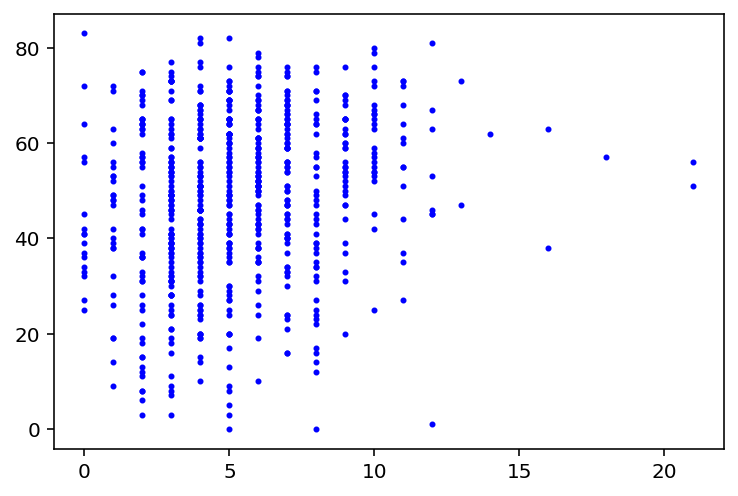

In [37]:
pop = []
repetition = []
for s in ds.songs:
    if not s.spotify_info():
        continue
    c = s.chords()
    r = Counter()
    rep = 0
    for _, b in c.blocks:
        if b.block and b.block != "Z":
            r[b.block] += 1
    for _, count in r.items():
        rep += count - 1
#     print(r, rep)

    pop.append(s.spotify_info()["popularity"])
    repetition.append(rep)

plt.figure()
plt.plot(repetition, pop, 'bo', markersize=2)

Text(0, 0.5, 'Spotify popularity')

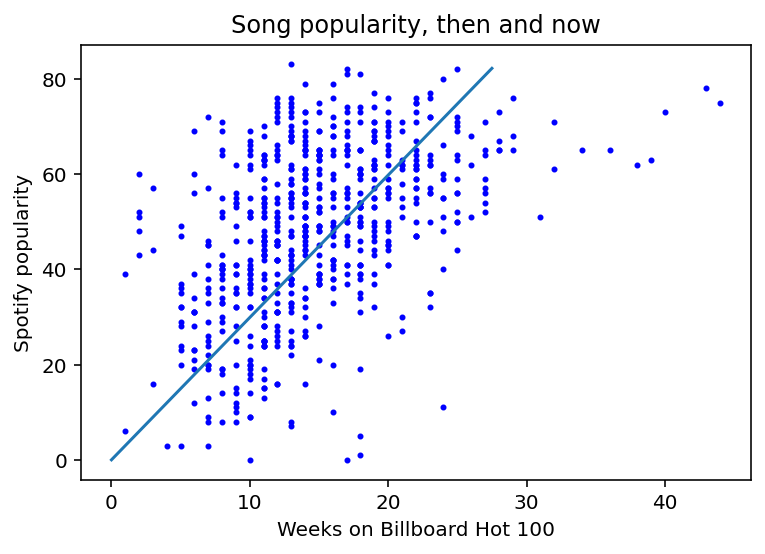

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

weeks = []
pop = []
for s in ds.songs_with_spotify():
    weeks.append(s.weeks_on_chart)
    pop.append(s.spotify_info()["popularity"])

model = LinearRegression(fit_intercept=False)
model.fit(np.array(weeks).reshape(-1, 1) , np.array(pop).reshape(-1, 1) )

x_best = np.linspace(0, 27.5, 100)
y_best = model.predict(x_best[:, np.newaxis])
    
plt.figure()
plt.plot(weeks, pop, 'bo', markersize=2)
plt.plot(x_best, y_best)
plt.title("Song popularity, then and now")
plt.xlabel("Weeks on Billboard Hot 100")
plt.ylabel("Spotify popularity")

In [47]:
stickiness_slope = model.coef_[0][0]
stickiness_intercept = 0#model.intercept_[0]

In [48]:
for s in ds.songs_with_spotify():
    ratio = ((s.spotify_info()["popularity"] - stickiness_intercept) / s.weeks_on_chart)
    stickiness = (ratio / stickiness_slope) - 1
    s.stickiness = stickiness

Text(0, 0.5, 'Spotify popularity')

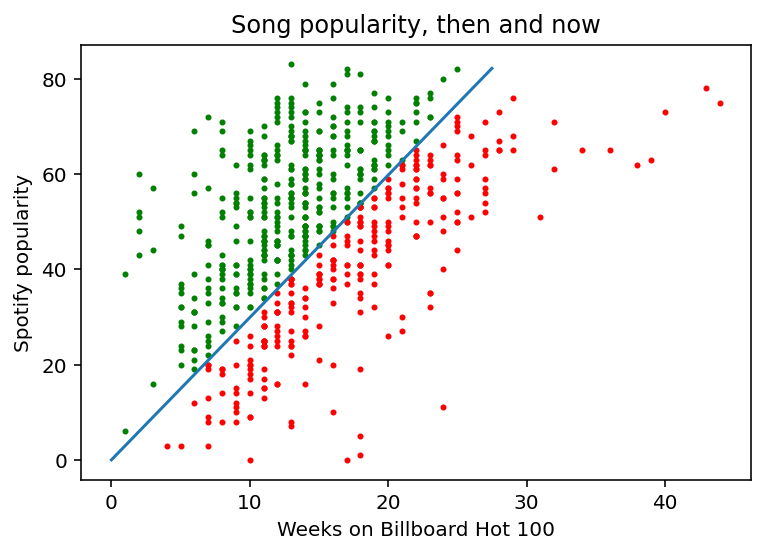

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

weeks_stick = []
pop_stick = []
weeks_nonstick = []
pop_nonstick = []
for s in ds.songs_with_spotify():
    if s.stickiness > 0:
        weeks_stick.append(s.weeks_on_chart)
        pop_stick.append(s.spotify_info()["popularity"])
    else:
        weeks_nonstick.append(s.weeks_on_chart)
        pop_nonstick.append(s.spotify_info()["popularity"])

plt.figure()
plt.plot(weeks_stick, pop_stick, 'go', markersize=2)
plt.plot(weeks_nonstick, pop_nonstick, 'ro', markersize=2)
plt.plot(x_best, y_best)
plt.title("Song popularity, then and now")
plt.xlabel("Weeks on Billboard Hot 100")
plt.ylabel("Spotify popularity")

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


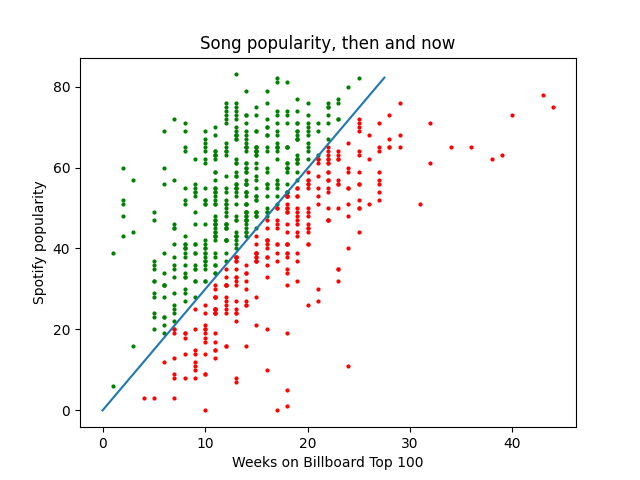

Text(0, 0.5, 'Spotify popularity')

In [70]:
from sklearn.linear_model import LinearRegression
import numpy as np

weeks_stick = []
pop_stick = []
song_stick = []
weeks_nonstick = []
pop_nonstick = []
song_nonstick = []
for s in ds.songs_with_spotify():
    if s.stickiness > 0:
        weeks_stick.append(s.weeks_on_chart)
        pop_stick.append(s.spotify_info()["popularity"])
        song_stick.append(s)
    else:
        weeks_nonstick.append(s.weeks_on_chart)
        pop_nonstick.append(s.spotify_info()["popularity"])
        song_nonstick.append(s)

plt.figure()
plt.plot(weeks_stick, pop_stick, 'go', markersize=2)
plt.plot(weeks_nonstick, pop_nonstick, 'ro', markersize=2)
plt.plot(x_best, y_best)
plt.title("Song popularity, then and now")
plt.xlabel("Weeks on Billboard Top 100")
plt.ylabel("Spotify popularity")

<IPython.core.display.Javascript object>


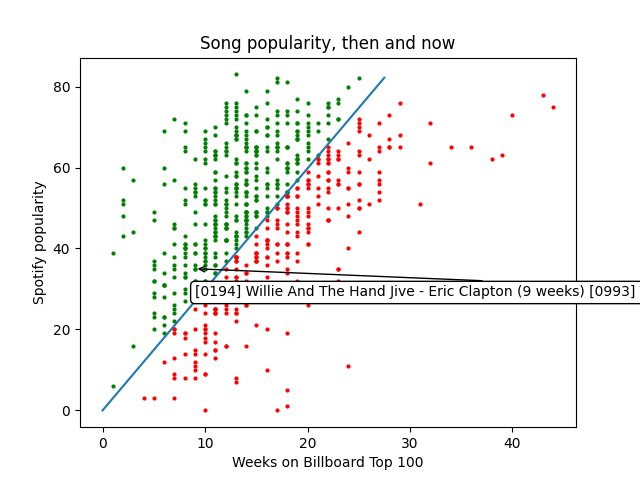

Text(0, 0.5, 'Spotify popularity')

In [78]:
fig,ax = plt.subplots()

# code from https://stackoverflow.com/questions/7908636/how-to-add-hovering-annotations-in-matplotlib
def update_annot(sc, ind, songlist):
    x, y= sc.get_data()
    pos = x[ind["ind"][0]], y[ind["ind"][0]]
    annot.xy = pos
    text = " ".join([str(songlist[n]) for n in ind["ind"]])
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(1)


sc_stick, = plt.plot(weeks_stick, pop_stick, 'go', markersize=2)
sc_nonstick, = plt.plot(weeks_nonstick, pop_nonstick, 'ro', markersize=2)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc_stick.contains(event)
        line, songlist = sc_stick, song_stick
        if not cont:
            cont, ind = sc_nonstick.contains(event)
            line, songlist = sc_nonstick, song_nonstick
        if cont:
            update_annot(line, ind, songlist)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

annot = ax.annotate("ghjkhjk", xy=(0,0), xytext=(0,-20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)


fig.canvas.mpl_connect("motion_notify_event", hover)
plt.plot(x_best, y_best)
plt.title("Song popularity, then and now")
plt.xlabel("Weeks on Billboard Top 100")
plt.ylabel("Spotify popularity")

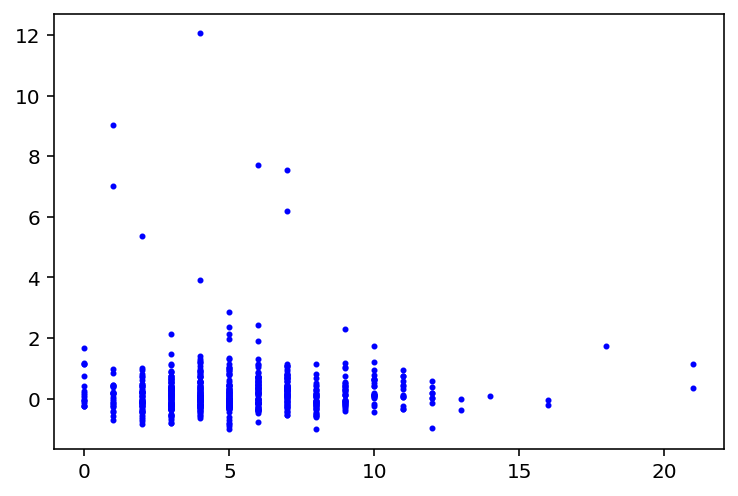

In [317]:
stickiness = []
repetition = []
for s in ds.songs_with_spotify():
    c = s.chords()
    r = Counter()
    rep = 0
    for _, b in c.blocks:
        if b.block and b.block != "Z":
            r[b.block] += 1
    for _, count in r.items():
        rep += count - 1
#     print(r, rep)

    stickiness.append(s.stickiness)
    repetition.append(rep)

plt.figure()
plt.plot(repetition, stickiness, 'bo', markersize=2)

In [318]:
# for s in ds.songs_with_spotify():
#     c = s.chords()
#     print(list(c.linear_roman()))
#     print(c.transition_probabilities(roman=True))
#     print(c.transition_probabilities(roman=True, scaleDegrees=True))
#     print(c.roman_transition_vector())
#     break

In [348]:
all_chords = Counter()
for s in ds.songs_with_spotify():
    c = s.chords()
    for r in c.linear_roman():
        if r.functionalityScore > 20:
            all_chords[r.scaleDegree] += 1
print(all_chords)

Counter({1: 13743, 5: 6721, 4: 6302, 2: 2399, 6: 906, 3: 165, 7: 7})


In [350]:
features = []
stickiness = []
for s in ds.songs_with_spotify():
#     r = Counter()
#     repetition = 0
#     for _, b in c.blocks:
#         if b.block and b.block != "Z":
#             r[b.block] += 1
#     for _, count in r.items():
#         repetition += count - 1

    f = []
    c = s.chords()
#     romans = c.linear_roman()
    
#     for r in romans:
        
#     counter = Counter(c.linear_roman(scaleDegrees=True))
#     for sd1 in range(1, 7 + 1):
#         f.append(counter[sd1])
    print(f)
    features.append(s.chords().roman_transition_vector()) # [s.peak_rank, repetition]
    stickiness.append(s.stickiness > 0)

[0.0012369933784472096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0010914647456887142, 0.0, 0.0, 0.0, 0.00014878738282993602, 0.0, 0.0]
[0.0029833369715491524, 0.006252605252188412, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0013825220112057047, 0.004585243851604835, 0.0, 0.0, 0.0022318107424490405, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0006347191367819739, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0008927242969796162, 0.0, 0.0]
[0.0013825220112057047, 0.00041684035014589413, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0015280506439641999, 0.0016673614005835765, 0.0, 0.0, 0.0028269602737687844, 0.0, 0.0]
[0.0005093502146547333, 0.0012505210504376823, 0.0, 0.0011107584893684545, 0.00029757476565987203, 0.0, 0.0]
[0.0032743942370661427, 0.0, 0.0, 0.010155506188511583, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0007933989209774674, 0.0016366612111292963, 0.0, 0.0]
[0.0008731717965509714, 0.0, 0.0, 0.0007933989209774674, 0.00074393691414968, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0025388765471278957, 0.0, 0.0, 0.0]
[0.0030561012879283997, 0.0, 0.0, 0.011107584893

[0.0027650440224114095, 0.004168403501458941, 0.0, 0.006505871152015234, 0.00148787382829936, 0.0, 0.0]
[0.0019646365422396855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.00021829294913774285, 0.006669445602334306, 0.0, 0.0, 0.0016366612111292963, 0.0, 0.0]
[0.0013097576948264572, 0.003334722801167153, 0.0, 0.0023801967629324024, 0.0023805981252789763, 0.006622516556291391, 0.0]
[0.0005093502146547333, 0.0008336807002917883, 0.0, 0.0036496350364963502, 0.0, 0.0, 0.0]
[0.005748380993960561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.00014552863275849522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0017463435931019428, 0.0, 0.0, 0.0, 0.0041660467192382086, 0.0, 0.0]
[0.0006548788474132286, 0.00041684035014589413, 0.0, 0.0, 0.00148787382829936, 0.0, 0.0]
[0.0008004074801717238, 0.0008336807002917883, 0.0, 0.0, 0.0011902990626394881, 0.0, 0.0]
[0.00029105726551699045, 0.0, 0.07272727272727272, 0.0011107584893684545, 0.00014878738282993602, 0.0, 0.0]
[0.001891872225860438, 0.0029178824510212586, 0.0, 0.001904157410345922

[0.0013097576948264572, 0.0, 0.0, 0.000952078705172961, 0.0, 0.008830022075055188, 0.0]
[0.0026922797060321617, 0.0, 0.0, 0.0036496350364963502, 0.004612408867728016, 0.0, 0.0]
[0.00021829294913774285, 0.0, 0.006060606060606061, 0.0, 0.0005951495313197441, 0.0, 0.0]
[0.0010187004293094667, 0.0, 0.0, 0.002221516978736909, 0.0016366612111292963, 0.0, 0.0]
[0.0013825220112057047, 0.00041684035014589413, 0.0, 0.0023801967629324024, 0.0019342359767891683, 0.0, 0.0]
[0.0034926871862038856, 0.00041684035014589413, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0017463435931019428, 0.003751563151313047, 0.006060606060606061, 0.004125674389082831, 0.005207558399047761, 0.0, 0.0]
[0.0016008149603434477, 0.0008336807002917883, 0.0, 0.0030149158997143763, 0.0028269602737687844, 0.01545253863134658, 0.0]
[0.0016735792767226952, 0.0, 0.0, 0.0017454776261504284, 0.00297574765659872, 0.0, 0.0]
[0.0004365858982754857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0005093502146547333, 0.0, 0.0, 0.003490955252300857, 0.0049099836333878

In [345]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, stickiness, test_size=0.10, random_state=0)

clf = RandomForestRegressor(n_estimators=50) #(random_state=10) #(n_estimators=30)

# print(features, stickiness)
clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print(scores.mean())

print("score", clf.score(X_test, y_test))
print(clf.predict([X_test[1]]))
print(y_test[1])
print(clf.n_features_in_)


-0.09553730527273485
score -0.049231297030666976
[12.88]
17
42


In [326]:
import math
print(len(features[0]))
math.sqrt(len(features[0]))


42


6.48074069840786

In [346]:
g_cv = GridSearchCV(RandomForestRegressor(random_state=0),
              param_grid={
                  'max_depth': [5, 10, 15, None],
                  'min_samples_split': range(2, 10),
                  'min_samples_leaf': [1, 2, 4],
                  'n_estimators': [10, 100, 25],
                  'max_features': ['auto', 'log2']
              }, cv=3, refit=True)

g_cv.fit(X_train, y_train)
print(g_cv.best_params_)
print(g_cv.best_score_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.016185716259650856


In [342]:
g_cv = GridSearchCV(RandomForestClassifier(random_state=0),
              param_grid={
                  'max_depth': [5, 10, 15, None],
                  'min_samples_split': range(2, 10),
                  'min_samples_leaf': [1, 2, 4],
                  'n_estimators': [10, 100, 25, 40, 50, 60, 75],
                  'max_features': ['auto', 'log2']
              }, cv=3, refit=True)

g_cv.fit(X_train, y_train)
print(g_cv.best_params_)
print(g_cv.best_score_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100}
0.5993265993265994


In [ ]:
print(clf.predict_proba([
    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
]))